In [1]:
import os.path
import re

import pandas as pd
import numpy as np
import seaborn as sns

# Data Loading and Pre-processing

In [2]:
FILEPATH = os.path.abspath("../data/2023-03-25_22hr_29min_ptwr_data.tsv")

In [3]:
df = pd.read_csv(FILEPATH, sep="\t")
print(df.head(15))
print(df.describe())

                                       make             model  \
0   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
1   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
2   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
3   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
4   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
5   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
6   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
7   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
8   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
9   /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
10  /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
11  /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
12  /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
13  /make/acura-power-to-weight-ratio-stats   /model/acura-cl   
14  /make/acura-power-to-

In [4]:
MAKE = "make"
MODEL = "model"
SPECS = "specs"

In [5]:
CLEAN_MAKE = re.compile(r"((/make/)|(\-power\-to\-weight\-ratio\-stats))")
CLEAN_MODEL = re.compile(r"(/model/)")
CLEAN_SPECS = re.compile(r"(\\t|\\n)")

df[MAKE] = df[MAKE].apply(lambda x: CLEAN_MAKE.sub("", x))
df[MODEL] = df[MODEL].apply(lambda x: CLEAN_MODEL.sub("", x))
df[SPECS] = df[SPECS].apply(lambda x: CLEAN_SPECS.sub("", x))

print(df.head(15))

     make      model                            specs
0   acura   acura-cl         1997 Acura CL 2.2 :0.047
1   acura   acura-cl         1998 Acura CL 2.3 :0.049
2   acura   acura-cl  1998 Acura CL 2.3 Premium:0.049
3   acura   acura-cl         1999 Acura CL 2.3 :0.049
4   acura   acura-cl         1997 Acura CL 3.0 :0.062
5   acura   acura-cl         1998 Acura CL 3.0 :0.062
6   acura   acura-cl  1998 Acura CL 3.0 Premium:0.062
7   acura   acura-cl         1999 Acura CL 3.0 :0.062
8   acura   acura-cl         2001 Acura CL 3.2 :0.065
9   acura   acura-cl   2001 Acura CL 3.2 Type-S:0.074
10  acura   acura-cl         2002 Acura CL 3.2 :0.065
11  acura   acura-cl   2002 Acura CL 3.2 Type-S:0.074
12  acura   acura-cl         2003 Acura CL 3.2 :0.065
13  acura   acura-cl   2003 Acura CL 3.2 Type-S:0.074
14  acura  acura-ilx           2013 Acura ILX  :0.052


In [6]:
SEPARATOR = ":"
SPECS1 = "specs1"
df[SPECS1] = df[SPECS].apply(lambda x: float(x.split(SEPARATOR)[-1]))
df[SPECS] = df[SPECS].apply(lambda x: SEPARATOR.join((x.split(SEPARATOR)[:-1])))
print(df.head(15))
print(df.describe())

     make      model                      specs  specs1
0   acura   acura-cl         1997 Acura CL 2.2    0.047
1   acura   acura-cl         1998 Acura CL 2.3    0.049
2   acura   acura-cl  1998 Acura CL 2.3 Premium   0.049
3   acura   acura-cl         1999 Acura CL 2.3    0.049
4   acura   acura-cl         1997 Acura CL 3.0    0.062
5   acura   acura-cl         1998 Acura CL 3.0    0.062
6   acura   acura-cl  1998 Acura CL 3.0 Premium   0.062
7   acura   acura-cl         1999 Acura CL 3.0    0.062
8   acura   acura-cl         2001 Acura CL 3.2    0.065
9   acura   acura-cl   2001 Acura CL 3.2 Type-S   0.074
10  acura   acura-cl         2002 Acura CL 3.2    0.065
11  acura   acura-cl   2002 Acura CL 3.2 Type-S   0.074
12  acura   acura-cl         2003 Acura CL 3.2    0.065
13  acura   acura-cl   2003 Acura CL 3.2 Type-S   0.074
14  acura  acura-ilx           2013 Acura ILX     0.052
             specs1
count  43219.000000
mean       0.064918
std        0.029648
min        0.017000
25% 

# Data Exploration: Raw Dataset

## Entire Dataset

The kde plot and mean for the raw ptw ratios.

0.06491797589023347


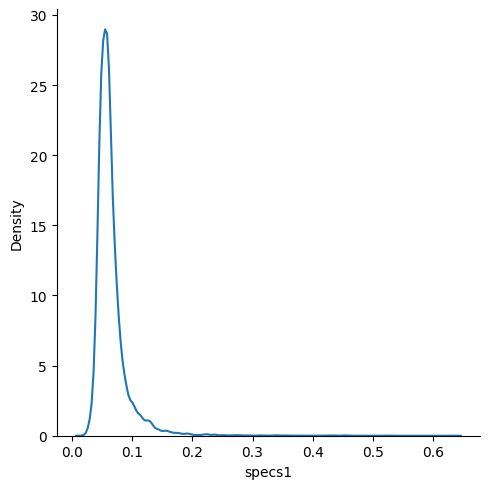

In [7]:
print(np.mean(df[SPECS1]))
sns.displot(data=df, x=SPECS1, kind='kde')

## By Make

If we take the median, min and max values for ptw from the raw dataset, these are the makes and their kde plots.

         make         model                        specs  specs1
11995  fisker  fisker-karma   2012 Fisker Karma EcoChic    0.076
11996  fisker  fisker-karma  2012 Fisker Karma EcoSport    0.076


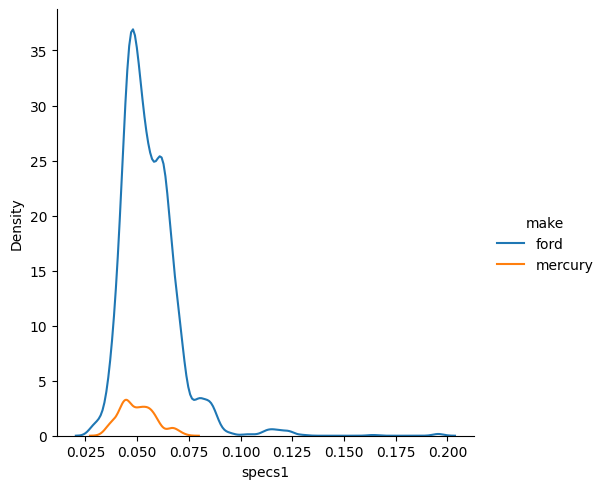

In [8]:
df_pivot = df[[MAKE,SPECS1]].groupby(MAKE, as_index=False).sum()
median_make = df_pivot[df_pivot[SPECS1] == df_pivot[SPECS1].median()][MAKE].tolist()[0]
min_make = df_pivot[df_pivot[SPECS1] == df_pivot[SPECS1].min()][MAKE].tolist()[0]
max_make = df_pivot[df_pivot[SPECS1] == df_pivot[SPECS1].max()][MAKE].tolist()[0]
df_pivot_data = df[df[MAKE].isin([median_make, max_make])]

print(df[df[MAKE] == min_make].head())  # the min only has two models, which is not enough for a kde plot, so just print the row level data
sns.displot(data=df_pivot_data, x=SPECS1, hue=MAKE, kind='kde')

# Data Exploration: Normalized Dataset

## Entire Dataset

The kde plot and mean for the ptw data after averaging the ptws over all models by make.

0.06491797589023347


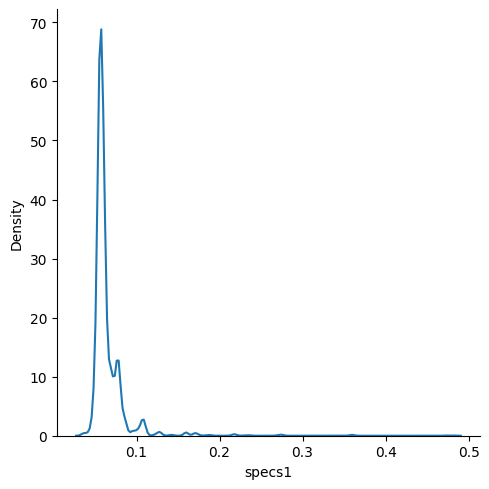

In [9]:
df_pivot_normalized = df[[MAKE,SPECS1]].groupby(MAKE, as_index=False, group_keys=False).apply(lambda x: pd.DataFrame({MAKE: x[MAKE], SPECS1: np.mean(x[SPECS1])}))

print(np.mean(df_pivot_normalized[SPECS1]))
sns.displot(data=df_pivot_normalized, x=SPECS1, kind='kde')

## By Make

If we average the ptw ratios for all models for a make, then the following are the makes (and raw data kde plots for those makes) for the median, min and max averaged ptw ratios.

chrysler
smart
hennessey


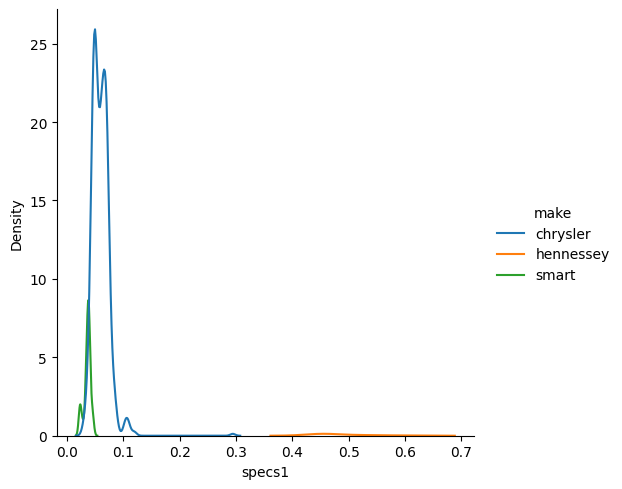

In [10]:
median_make_normalized = df_pivot_normalized[df_pivot_normalized[SPECS1] == df_pivot_normalized[SPECS1].median()][MAKE].tolist()[0]
min_make_normalized = df_pivot_normalized[df_pivot_normalized[SPECS1] == df_pivot_normalized[SPECS1].min()][MAKE].tolist()[0]
max_make_normalized = df_pivot_normalized[df_pivot_normalized[SPECS1] == df_pivot_normalized[SPECS1].max()][MAKE].tolist()[0]
print(median_make_normalized)
print(min_make_normalized)
print(max_make_normalized)
df_pivot_normalized_data = df[df[MAKE].isin([median_make_normalized, min_make_normalized, max_make_normalized])]

sns.displot(data=df_pivot_normalized_data, x=SPECS1, hue=MAKE, kind='kde')